# 음성의 물리적 특성
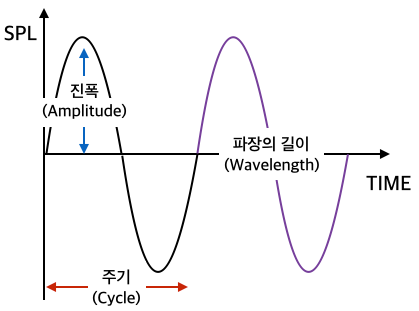

## 1. 주파수 (Frequency)
    주파수는 일정 시간 동안 반복되는 진동의 횟수로, 헤르츠(Hz) 단위로 측정  
    
    음높이(Pitch)
        주파수가 높을수록 음의 높이가 높아지고, 주파수가 낮을수록 음의 높이가 낮아짐  
        예를 들어, 여성의 목소리는 남성의 목소리보다 주파수가 높은 경향이 있음

    기본 주파수(F0)
        성대의 기본 진동 주파수로, 개인의 음성을 특징짓는 중요한 요소

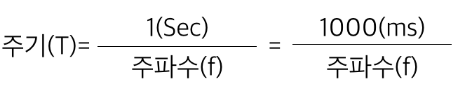

## 2. 진폭 (Amplitude)
    진폭은 음파의 최대 변위로, 소리의 크기를 나타냄
    
    음량(Loudness)
        진폭이 클수록 소리가 크고, 진폭이 작을수록 소리가 작음  
        데시벨(dB) 단위로 측정

    동적 범위
        말하는 사람의 감정 상태나 의도에 따라 진폭이 변할 수 있음  
        예를 들어, 격양된 목소리는 큰 진폭을 가지며, 속삭이는 목소리는 작은 진폭을 가짐

## 3. 파형 (Waveform)
    파형은 시간에 따른 음압 변화를 그래프로 나타낸 것
    
    복합파
        실제 음성은 여러 주파수 성분이 합쳐진 복합파로 구성됨  
        기본 주파수와 여러 고조파(harmonics)로 이루어짐  
        
    파형 분석
        파형을 분석하여 음성의 특징을 추출할 수 있음  
        예를 들어, 특정 음소(음의 단위)는 고유한 파형을 가짐

## 4. 스펙트럼 (Spectrum)
    스펙트럼은 주파수 성분의 분포를 나타낸 것

    스펙트럼 분석
        푸리에 변환(Fourier Transform)을 사용하여 시간 영역의 파형을 주파수 영역으로 변환
        이를 통해 음성의 주파수 성분을 분석할 수 있음

    포먼트(Formant)
        음성의 스펙트럼에서 강하게 나타나는 주파수 대역으로, 모음의 음질을 결정
        F1, F2, F3 등으로 나타내며, 각각 특정한 주파수를 가짐

## 5. 시간적 특성 (Temporal Characteristics)
    지속 시간(Duration)
        각 음소나 단어가 발음되는 시간

    진폭 변조(Amplitude Modulation)
        시간에 따른 진폭의 변화로, 스트레스(강조)나 리듬을 형성

    주파수 변조(Frequency Modulation)
        시간에 따른 주파수의 변화로, 억양(intonation)이나 멜로디를 형성

## 6. 음색 (Timbre)
    음색은 소리의 고유한 색깔로, 동일한 높이와 크기의 소리라도 각기 다른 소리로 인식되는 특성

    성분
        기본 주파수 외에 고조파의 조합, 공명강의 형태, 발음 기관의 특성 등이 음색을 결정

### 정리
- 주파수: 소리의 높이를 결정하며, 헤르츠(Hz)로 측정
- 진폭: 소리의 크기를 결정하며, 데시벨(dB)로 측정
- 파형: 시간에 따른 음압 변화를 나타내며, 복합파로 구성
- 스펙트럼: 주파수 성분의 분포를 나타내며, 포먼트 등을 포함
- 시간적 특성: 소리의 지속 시간, 진폭 및 주파수 변조를 포함
- 음색: 소리의 고유한 특성을 나타내며, 주파수 성분과 공명 특성 등이 영향을 미침
- 이러한 물리적 특성들은 모두 상호작용하여 다양한 음성을 형성하고, 이를 통해 우리는 의사소통을 할 수 있음

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import soundfile as sf

# 음성 파일 로드
file_path = '녹음.wav'
signal, sampling_rate = sf.read(file_path)

# 샘플링 주파수 및 샘플링 시간 설정
duration = len(signal) / sampling_rate
t = np.linspace(0, duration, len(signal), endpoint=False)

## 시간 도메인 신호 (Time Domain Signal)
    시간에 따른 음성 신호의 진폭 변화 확인
    X축: 시간 (초)
    Y축: 진폭
    해석
        이 그래프는 원래 음성 신호가 시간에 따라 어떻게 변화하는지 보여줌  
        음성의 강도와 패턴을 이해하는 데 유용
        음성의 소리 파형을 직접 볼 수 있음

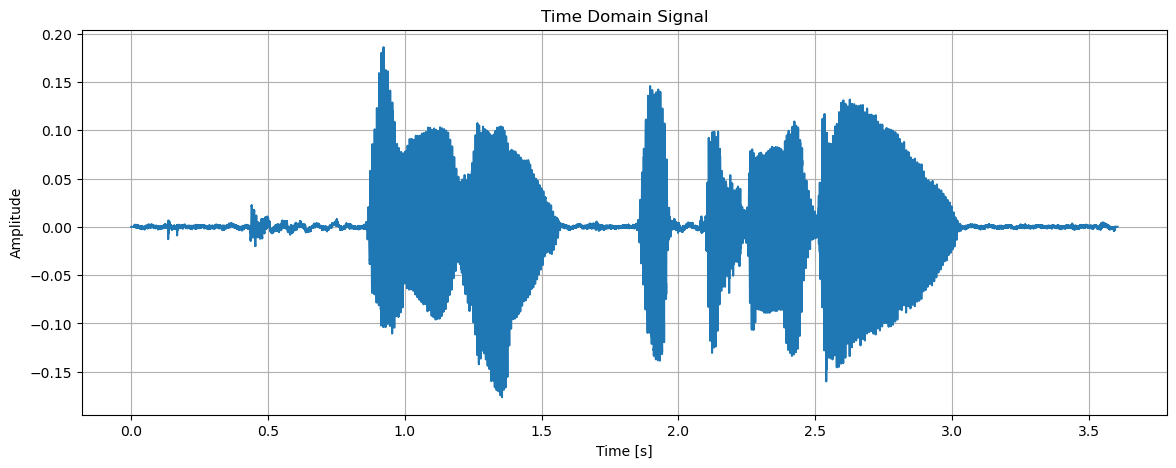

In [11]:
# 1. 시간 도메인 신호 (Time Domain Signal)
plt.figure(figsize=(14, 5))
plt.plot(t, signal)
plt.title('Time Domain Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


## 주파수 도메인 신호 (Frequency Domain Signal)
    음성 신호의 주파수 성분과 각각의 주파수 성분의 크기 확인

    X축: 주파수 (헤르츠, Hz)
    Y축: 크기 (진폭)
    해석  
        이 그래프는 FFT(Fast Fourier Transform)를 사용하여 주파수 도메인에서 신호를 분석한 것  
        주파수 성분이 얼마나 강하게 나타나는지 확인할 수 있음  
        특정 주파수에서 피크가 나타나면 그 주파수가 신호에서 중요한 성분임을 나타냄  
        예를 들어, 성대의 기본 진동 주파수와 고조파들을 확인할 수 있음

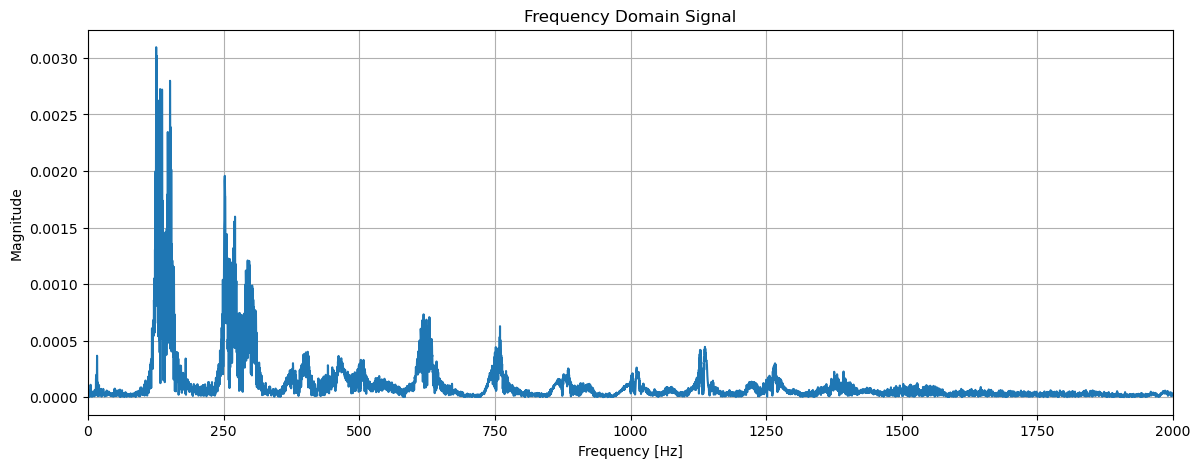

In [12]:
# 2. 주파수 도메인 신호 (Frequency Domain Signal)
N = len(signal)
yf = fft(signal)
xf = fftfreq(N, 1 / sampling_rate)

plt.figure(figsize=(14, 5))
plt.plot(xf[:N // 2], np.abs(yf[:N // 2]) / N)
plt.title('Frequency Domain Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(0, 2000)
plt.grid()
plt.show()

## 스펙트로그램 (Spectrogram)
    시간에 따른 주파수 성분의 변화를 색상으로 표현한 것입니다.
    X축: 시간 (초)
    Y축: 주파수 (헤르츠, Hz, 로그 스케일)
    색상: 주파수 성분의 강도 (dB)
    해석
        이 그래프는 음성 신호의 주파수 성분이 시간에 따라 어떻게 변하는지를 보여줌  
        음성의 타임-프리퀀시(time-frequency) 특성을 분석하는 데 유용  
        예를 들어, 특정 시간에 특정 주파수가 강하게 나타나는지, 음성의 포먼트(formant) 구조를 분석할 수 있음  
        포먼트는 음성의 모음 소리를 구별하는 데 중요한 주파수 대역

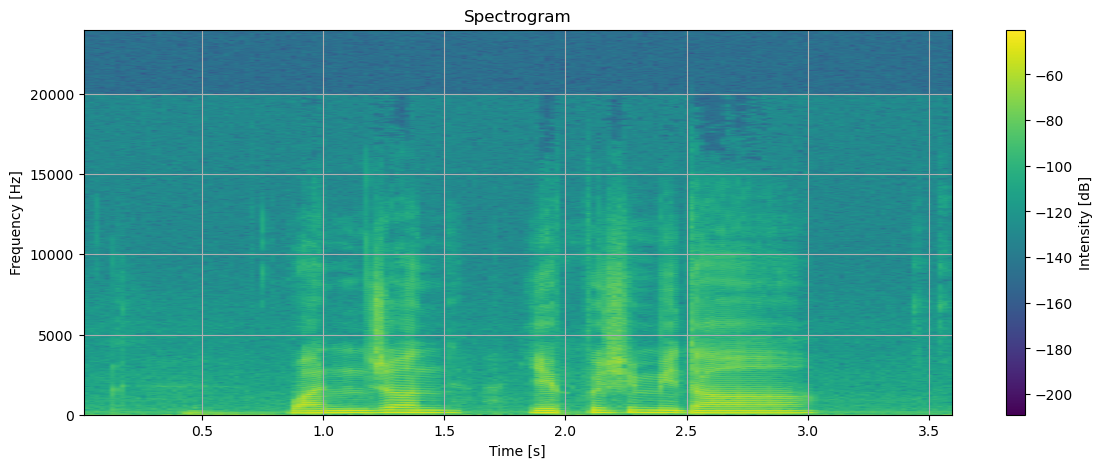

In [13]:
# 3. 스펙트럼 (Spectrogram)
plt.figure(figsize=(14, 5))
plt.specgram(signal, Fs=sampling_rate, NFFT=2048, noverlap=1024, cmap='viridis')
plt.title('Spectrogram')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Intensity [dB]')
plt.grid()
plt.show()

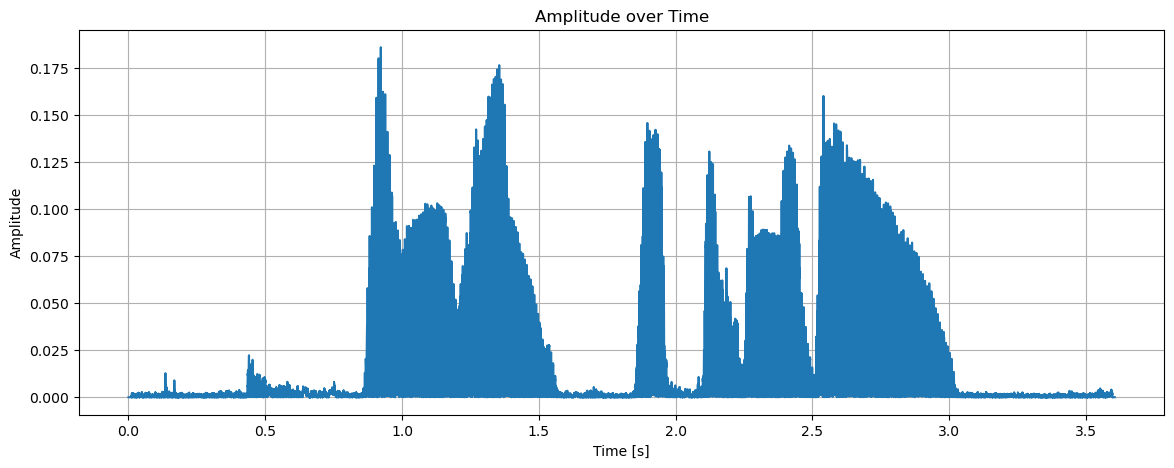

In [14]:
# 4. 진폭 (Amplitude)
plt.figure(figsize=(14, 5))
plt.plot(t, np.abs(signal))
plt.title('Amplitude over Time')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

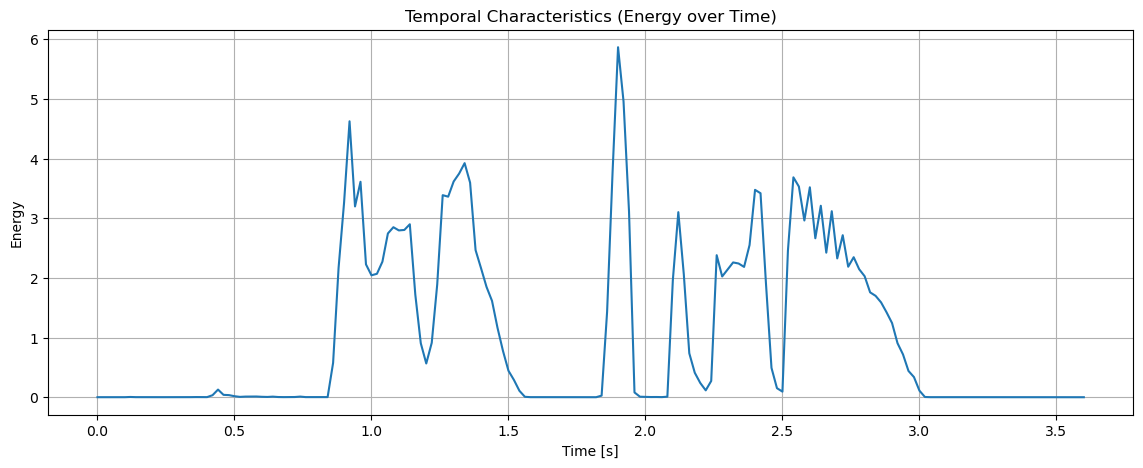

In [15]:
# 5. 시간적 특성 (Temporal Characteristics)
# 여기서는 신호의 에너지를 시간에 따라 계산하여 표시
window_size = int(sampling_rate * 0.02)  # 20ms 창
energy = np.array([np.sum(signal[i:i + window_size] ** 2) for i in range(0, len(signal), window_size)])

plt.figure(figsize=(14, 5))
plt.plot(np.arange(len(energy)) * 0.02, energy)
plt.title('Temporal Characteristics (Energy over Time)')
plt.xlabel('Time [s]')
plt.ylabel('Energy')
plt.grid()
plt.show()

In [16]:
# !pip install librosa

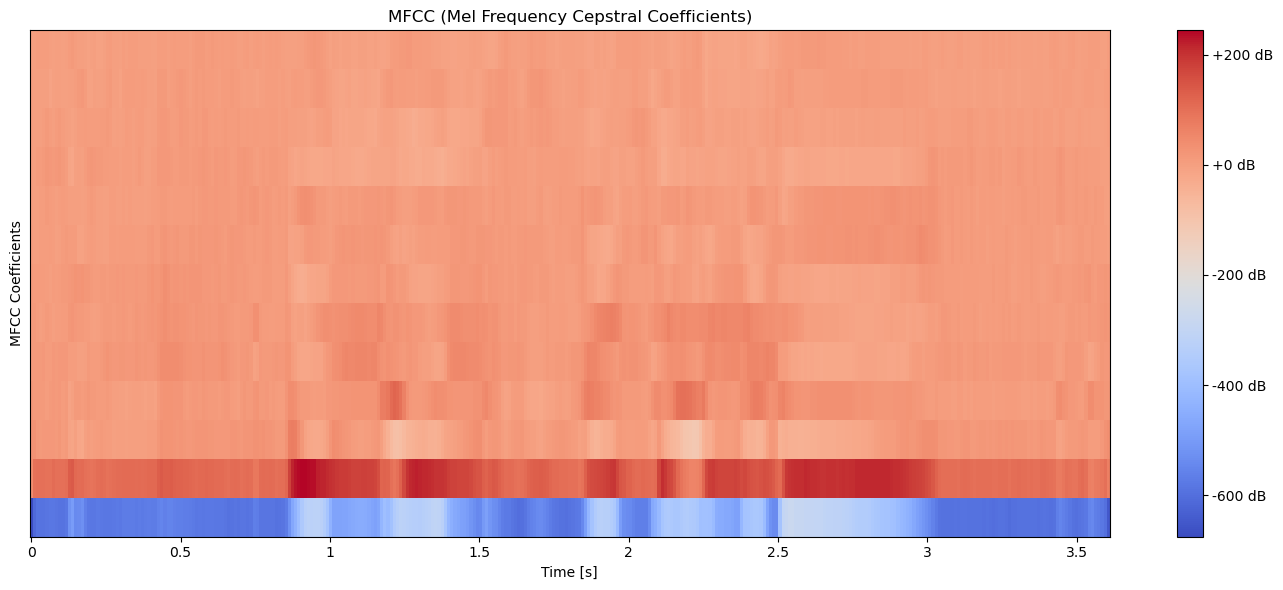

In [17]:
# 6. 음색 (Timbre)
# 오디오 신호의 주파수 성분을 통해 고유한 특성을 추출하는 과정
# 멜 주파수 켑스트럼 계수(MFCC)를 사용한 음색 분석 방법 예시
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# 오디오 파일 로드
file_path = '녹음.wav'
signal, sampling_rate = librosa.load(file_path, sr=None)  # sr=None은 원본 샘플링 주파수를 유지

# MFCC 계산
mfccs = librosa.feature.mfcc(y=signal, sr=sampling_rate, n_mfcc=13) # 13개의 MFCC 계수를 계산

# 시각화
plt.figure(figsize=(14, 6))

# MFCC 시각화
librosa.display.specshow(mfccs, x_axis='time', sr=sampling_rate)
plt.colorbar(format='%+2.0f dB') # 각 계수의 크기
plt.title('MFCC (Mel Frequency Cepstral Coefficients)')
plt.xlabel('Time [s]') # 시간(초)
plt.ylabel('MFCC Coefficients') # MFCC 계수
plt.tight_layout()
plt.show()


### MFCC(Mel Frequency Cepstral Coefficients)
**멜 주파수 켑스트럼 계수(MFCC)**

    사람의 청각 인지 특성을 반영하기 위해 로그 주파수 스펙트럼을 멜 스펙트럼으로 변환한 후, 역푸리에 변환을 적용하여 계산
    MFCC는 주파수 축을 비선형적으로 변환하여 사람의 귀가 실제로 소리를 인식하는 방식에 더 가깝게 만듦
    MFCC는 음성 인식, 음악 정보 검색, 스피커 인식 등 다양한 음향 신호 처리 작업에서 중요한 특징으로 사용됨

    해석
        MFCC 시각화
            시간에 따라 변화하는 MFCC 계수는 오디오 신호의 음색을 나타냄
            각 계수는 특정 주파수 대역의 에너지를 나타내며, 이를 통해 신호의 주파수 특성 분석 가능
        음색 분석
            MFCC는 주파수 스펙트럼의 정보를 압축하여, 신호의 고유한 음색을 특징짓는 데 사용

### 피크 (Peak)
    피크는 신호가 최대값을 가지는 지점을 의미
    그래프에서 위쪽으로 솟아오르는 부분으로, 주기적인 신호에서는 반복적으로 나타날 수 있음
    
    예시) 음성 신호에서 피크는 발음이 강하게 들리는 순간이나 음악에서 큰 소리가 나는 순간을 나타낼 수 있음
    
### 트로프 (Trough)
    트로프는 신호가 최소값을 가지는 지점을 의미
    그래프에서 아래쪽으로 내려가는 부분

    예시) 음성 신호에서 트로프는 소리가 잠잠해지거나 발음이 약해지는 순간, 음악에서 소리가 작아지는 순간을 나타낼 수 있음

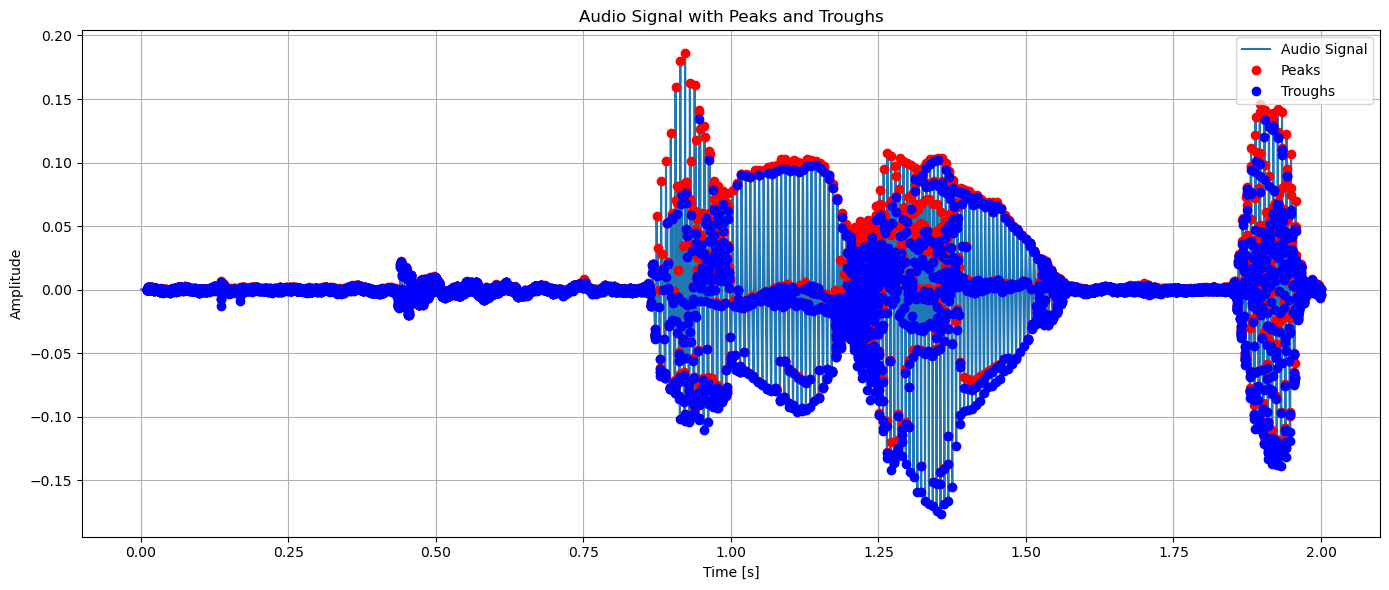

In [18]:
# 음성 신호에서 피크와 트로프를 찾아내어 시각화하는 예시
import numpy as np
import matplotlib.pyplot as plt
import librosa
import scipy.signal as signal

# 오디오 파일 로드
file_path = '녹음.wav'
audio_signal, sampling_rate = librosa.load(file_path, sr=None)  # sr=None은 원본 샘플링 주파수를 유지

# 신호의 일부를 선택 (예: 처음 2초)
duration = 2  # 2초
num_samples = int(duration * sampling_rate)
signal_segment = audio_signal[:num_samples]
time = np.linspace(0, duration, num_samples, endpoint=False)

# 피크와 트로프 찾기
peaks, _ = signal.find_peaks(signal_segment)
troughs, _ = signal.find_peaks(-signal_segment)  # 트로프를 찾기 위해 신호를 반전

# 시각화
plt.figure(figsize=(14, 6))

# 시간 영역 신호
plt.plot(time, signal_segment, label='Audio Signal')
plt.plot(time[peaks], signal_segment[peaks], 'ro', label='Peaks')
plt.plot(time[troughs], signal_segment[troughs], 'bo', label='Troughs')
plt.title('Audio Signal with Peaks and Troughs')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


피크 (Peaks): 신호의 진폭이 최대인 지점으로, 그래프에서 빨간 점으로 표시

트로프 (Troughs): 신호의 진폭이 최소인 지점으로, 그래프에서 파란 점으로 표시

진폭 (Amplitude): 신호의 세기를 나타내며, y축에 표시

시간 (Time): 신호의 시간적 변화를 나타내며, x축에 표시

피크와 트로프를 통해 신호의 변동성을 분석할 수 있으며, 이는 음성 인식, 음악 분석, 신호 처리 등 다양한 응용 분야에서 유용함

## 기본 주파수의 정의와 중요성

    기본 주파수
        주기적 신호
            주기적인 신호는 반복되는 패턴을 가지며, 이 패턴의 반복 주기를 측정할 수 있음
    
        기본 주파수(F0)
            기본 주파수는 신호가 1초 동안 반복되는 횟수를 의미(단위는 헤르츠(Hz))

    예시) 만약 신호가 1초 동안 100번 반복된다면, 이 신호의 기본 주파수는 100Hz이다.

### 음성 신호에서의 중요성
    피치(음높이)
        음성 신호에서 기본 주파수는 피치, 즉 음높이를 결정
        피치는 사람이 인지하는 소리의 높낮이를 의미

    성대 진동
        사람의 목소리에서 기본 주파수는 성대의 진동 속도와 관련이 있음
        성대가 빠르게 진동할수록 높은 주파수를 생성하고, 느리게 진동할수록 낮은 주파수를 생성

    음악
        악기 소리에서도 기본 주파수는 중요한 역할을 함
        기본 주파수와 그 배수 주파수(고조파)들은 악기의 음색을 결정

    예시를 통한 설명
        성인의 목소리
            남성의 목소리) 일반적으로 85Hz에서 180Hz 사이의 기본 주파수를 가짐
            여성의 목소리) 일반적으로 165Hz에서 255Hz 사이의 기본 주파수를 가짐

        악기 소리
            피아노의 A4 음) 기본 주파수는 440Hz

    기본 주파수 추정 방법
        기본 주파수를 추정하는 여러 가지 방법 중 두 가지 주요 방법 소개

        오토코릴레이션 (Autocorrelation):
            신호를 자기 자신과 비교하여 주기성을 찾는 방법입니다.
            신호의 자기상관 함수를 계산한 후, 첫 번째 피크를 찾아 기본 주파수를 추정합니다.
        
        푸리에 변환 (Fourier Transform):
            신호를 주파수 영역으로 변환하여 주파수 성분을 분석합니다.
            주파수 스펙트럼에서 가장 큰 피크를 찾아 기본 주파수를 추정합니다.

Estimated Fundamental Frequency (F0) from Autocorrelation: 139.94 Hz


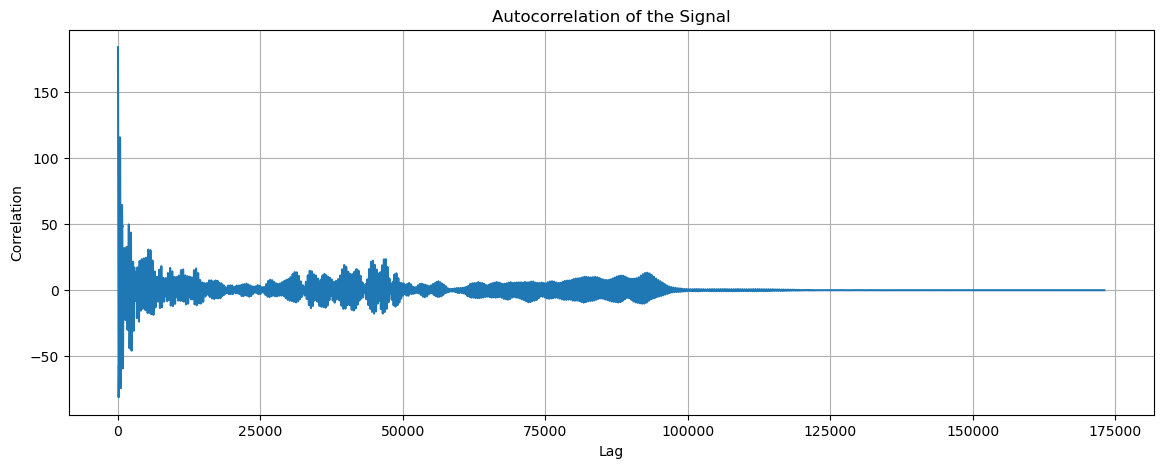

In [19]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

# 음성 파일 로드
file_path = '녹음.wav'
signal, sampling_rate = sf.read(file_path)

def autocorrelation(signal):
    """Calculate the autocorrelation of the signal."""
    result = np.correlate(signal, signal, mode='full')
    return result[result.size // 2:]

# 오토코릴레이션 계산
corr = autocorrelation(signal)

# 피크 찾기 (기본 주파수 F0)
d = np.diff(corr)
start = np.where(d > 0)[0][0]  # 첫 번째 상승 지점 찾기
peak = np.argmax(corr[start:]) + start
F0_autocorr = sampling_rate / peak

print(f"Estimated Fundamental Frequency (F0) from Autocorrelation: {F0_autocorr:.2f} Hz")

# 시각화
plt.figure(figsize=(14, 5))
plt.plot(corr)
plt.title('Autocorrelation of the Signal')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.grid()
plt.show()


### 푸리에 변환
    신호를 시간 영역에서 주파수 영역으로 변환하는 도구
    신호가 다양한 주파수 성분으로 구성되어 있음을 분석할 수 있음

    오케스트라 연주 예시
        오케스트라가 연주할 때, 여러 악기가 동시에 연주됨
        각 악기는 특정 주파수(피치)를 가지고 있고, 모든 악기의 소리는 합쳐져서 우리가 듣는 음악을 만듦
        
    
푸리에 변환의 역
         이 오케스트라 소리를 분석하여, 각 악기가 어떤 주파수를 연주하고 있는지, 즉 어떤 주파수 성분이 얼마나 있는지를 알아내는 것과 음.

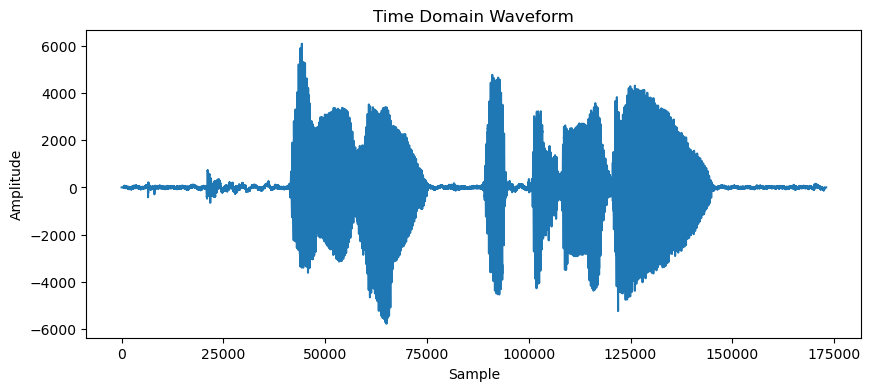

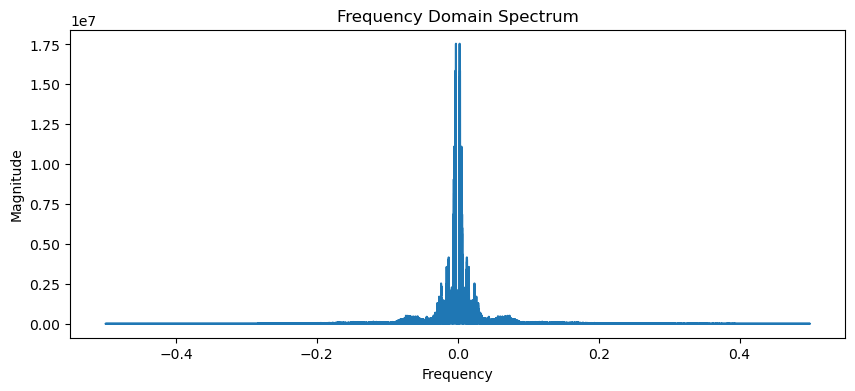

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fftpack import fft

# 예제 WAV 파일 읽기
sample_rate, audio_data = wavfile.read('녹음.wav')

# 시간 영역 파형 시각화
plt.figure(figsize=(10, 4))
plt.plot(audio_data)
plt.title('Time Domain Waveform')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

# 주파수 영역 분석 (푸리에 변환)
audio_fft = fft(audio_data)
freqs = np.fft.fftfreq(len(audio_fft))
plt.figure(figsize=(10, 4))
plt.plot(freqs, np.abs(audio_fft))
plt.title('Frequency Domain Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()


### 해석

#### **시간 영역 웨이브폼 (Time Domain Waveform)**

시간에 따라 신호의 진폭이 어떻게 변하는지를 보여줌

    진폭이 시간이 지남에 따라 변하는 패턴을 보임
    진폭이 높을수록 신호의 에너지가 크며, 소리의 강도가 높음을 나타냄

    소리의 시작과 끝
        그래프의 왼쪽과 오른쪽 끝 부분에서 진폭이 거의 0에 가까운 것을 볼 수 있음
        이는 신호의 시작과 끝 부분에서 소리가 없거나 매우 약하다는 것을 나타냄

    진폭의 변화
        중간 부분에서 진폭이 커지며, 이는 소리가 강해졌음을 나타냄
        여러 차례 피크(신호 최대값 지점)와 트로프(신호 최소값 지점)가 있으며, 이는 신호가 변동적임을 보여줌

#### **주파수 영역 스펙트럼 (Frequency Domain Spectrum)**

신호가 어떤 주파수 성분으로 구성되어 있는지를 보여줌

    중심 주파수
        주파수 영역에서 0 근처에 큰 피크가 있는 것을 볼 수 있음
        이는 신호가 저주파 성분을 많이 포함하고 있음을 나타냄

    고주파 성분
        x축의 양쪽 끝 부분에서는 주파수 성분의 크기가 거의 0에 가까운 것을 볼 수 있음
        이는 신호에 고주파 성분이 거의 없음을 나타냄

    대칭성
        주파수 영역 그래프가 대칭적으로 나타나는 것을 볼 수 있음
        이는 FFT의 특성으로, 복소수 신호의 실수 부분과 허수 부분이 대칭적으로 나타남

추가 해석

    주파수 대역
        주파수 성분이 주로 0 근처에 집중되어 있는 것은 이 신호가 주로 저주파 성분을 포함하고 있음을 의미
        이는 음성 신호나 음악 신호에서 자주 볼 수 있는 특징

    파형의 복잡성
        시간 영역에서 여러 번의 진폭 변화가 나타나는 복잡한 구조는, 신호가 단순한 톤이 아닌 다양한 주파수 성분의 혼합으로 이루어져 있음을 나타냄
    


## 푸리에 변환을 사용한 기본 주파수 추정

Estimated Fundamental Frequency (F0) from FFT: 125.65 Hz


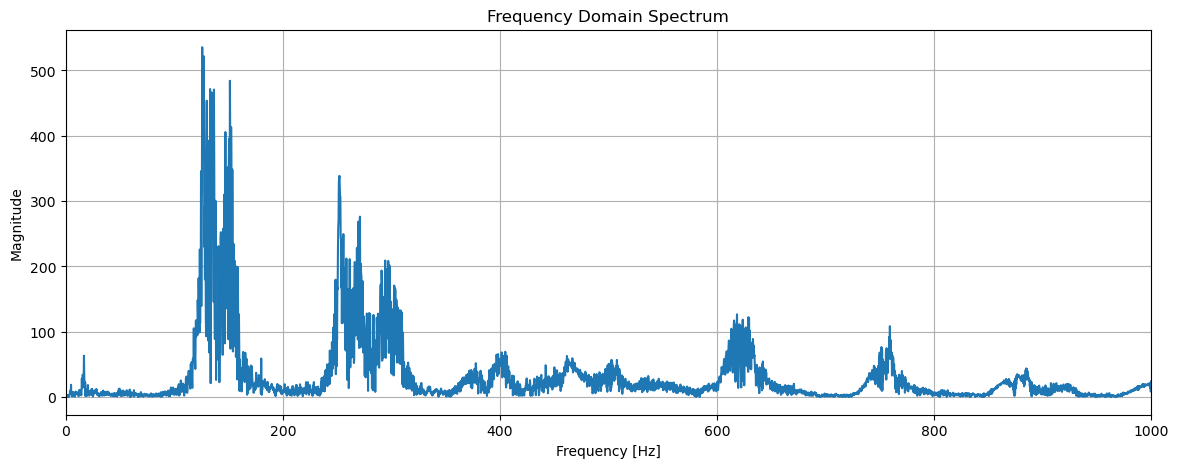

In [21]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

# 음성 파일 로드
file_path = '녹음.wav'
signal, sampling_rate = sf.read(file_path)

def calculate_fundamental_frequency(signal, sampling_rate):
    """Calculate the fundamental frequency of the signal using Fourier Transform."""
    # FFT 계산
    N = len(signal)
    yf = np.fft.fft(signal)
    xf = np.fft.fftfreq(N, 1 / sampling_rate)

    # 주파수 성분의 절대값 계산
    magnitude_spectrum = np.abs(yf)

    # 양의 주파수 성분만 사용
    half_N = N // 2
    xf = xf[:half_N]
    magnitude_spectrum = magnitude_spectrum[:half_N]

    # 가장 큰 주파수 성분 찾기
    peak_index = np.argmax(magnitude_spectrum[1:]) + 1  # DC 성분(0번째 인덱스)을 제외하고 찾음
    fundamental_frequency = xf[peak_index]

    return fundamental_frequency, xf, magnitude_spectrum

# 기본 주파수 계산
F0_fft, xf, magnitude_spectrum = calculate_fundamental_frequency(signal, sampling_rate)

print(f"Estimated Fundamental Frequency (F0) from FFT: {F0_fft:.2f} Hz")

# 시각화
plt.figure(figsize=(14, 5))
plt.plot(xf, magnitude_spectrum)
plt.title('Frequency Domain Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid()
plt.xlim(0, 1000)  # 주파수 범위를 0~1000Hz로 제한
plt.show()


### 기본 주파수 추정의 어려움
    노이즈
        신호에 포함된 잡음은 기본 주파수 추정을 어렵게 만듦
    신호의 복잡성
        복잡한 신호나 비주기적인 성분이 포함된 신호는 추정을 어렵게 함
    다중 주파수 성분
        여러 주파수 성분이 동시에 존재하는 경우, 기본 주파수를 정확히 추정하기 어려움

### 필터링 예시
저역 필터를 적용하기 전과 후의 오디오 신호를 시각적으로 비교

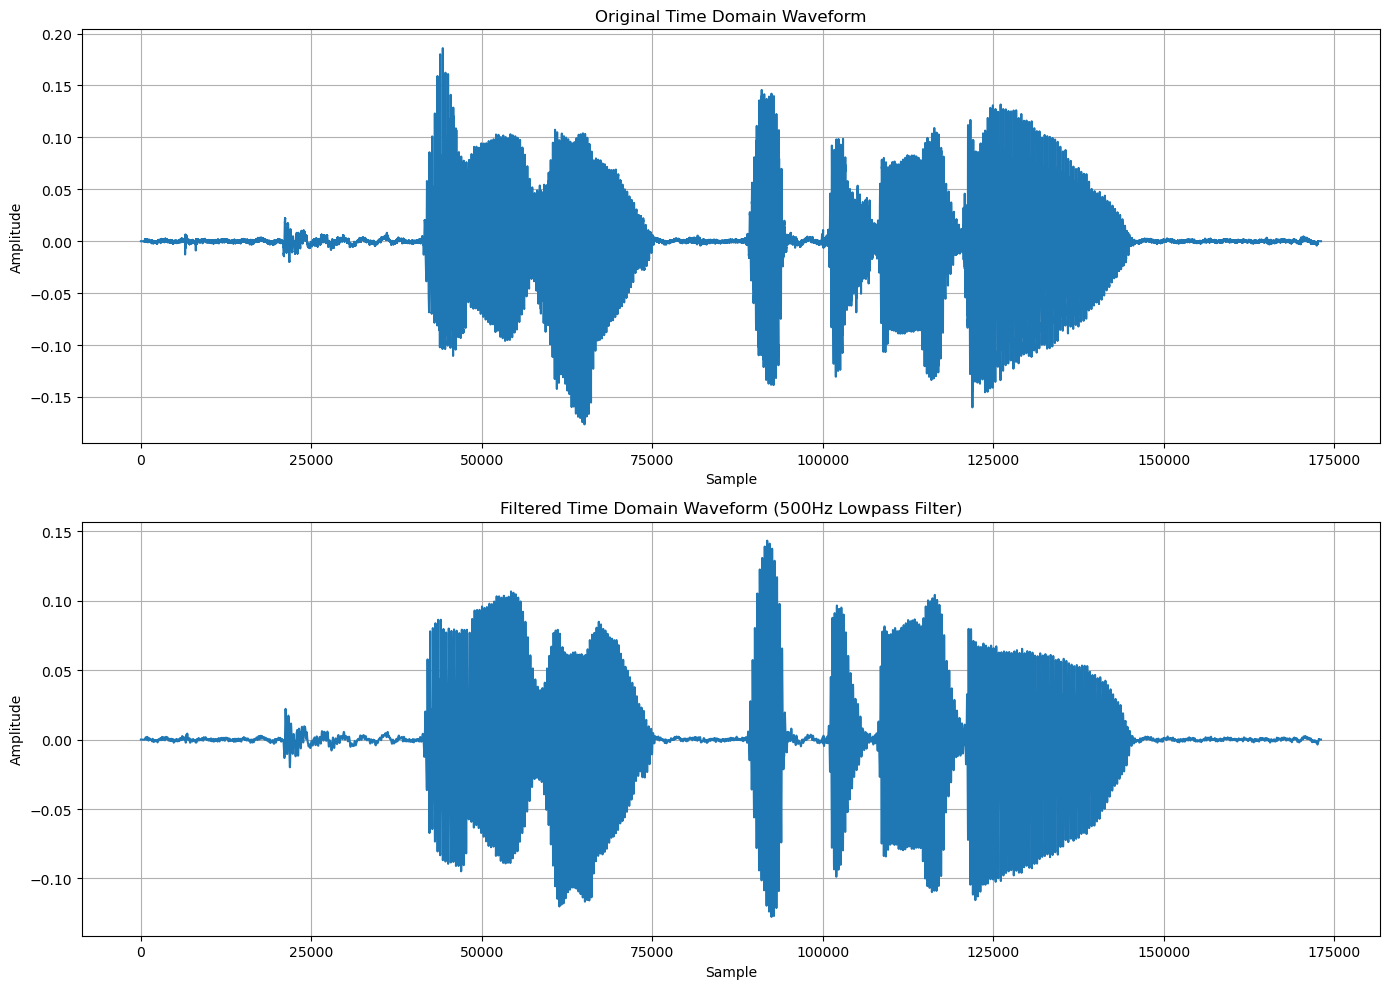

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import butter, lfilter

# 저역 필터 적용 함수
def lowpass_filter(data, cutoff, fs, order=8):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = lfilter(b, a, data)
    return y

# 음성 파일 로드
file_path = '녹음.wav'
signal, sampling_rate = sf.read(file_path)

# 필터 적용
cutoff_frequency = 500  # 500Hz 저역 필터
filtered_signal = lowpass_filter(signal, cutoff=cutoff_frequency, fs=sampling_rate)

# 시각화
plt.figure(figsize=(14, 10))

# 원본 신호 시각화
plt.subplot(2, 1, 1)
plt.plot(signal)
plt.title('Original Time Domain Waveform')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid()

# 필터링된 신호 시각화
plt.subplot(2, 1, 2)
plt.plot(filtered_signal)
plt.title('Filtered Time Domain Waveform (500Hz Lowpass Filter)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()

# 원본 신호와 필터링된 신호를 오디오 파일로 저장
sf.write('filtered_common_voice_ko_38203273.wav', filtered_signal, sampling_rate)
